In [145]:
import pandas as pd
df=pd.read_csv("data-new.csv")

In [146]:
df.head(6)

,age,gender,weight,sleeping-patterns,exercise-habits,blood-pressure,analog-fasting,analog-pp,glucose-fasting,glucose-pp,diabetic,Unnamed: 11
0,22,F,60,regular,active,115/75,310,315,93,110,no,simrans sister
1,21,F,51,regular,mid,110/70,313,319,108,105,no,simran
2,21,F,53,regular,inactive,120/80,309,317,130,120,no,karina
3,21,F,65,regular,inactive,125/80,311,312,115,115,no,roshni
4,20,F,70,irregular,inactive,130/85,314,317,106,110,no,sanjana
5,30,M,89,irregular,inactive,140/90,328,333,128,150,yes,the path guy


# Removing the last column which has the name of the person data is collected from

In [147]:

df.drop(columns=['Unnamed: 11'], inplace=True)


In [148]:
df.dtypes

age                   int64
gender               object
weight                int64
sleeping-patterns    object
exercise-habits      object
blood-pressure       object
analog-fasting        int64
analog-pp             int64
glucose-fasting       int64
glucose-pp            int64
diabetic             object
dtype: object

# creating systolic/diastolic as 2 fields:

In [149]:
import pandas as pd

# Splitting the 'blood-pressure' column into two separate columns
df[['systolic', 'diastolic']] = df['blood-pressure'].str.split('/', expand=True)

# Dropping the original 'blood-pressure' column
df.drop(columns=['blood-pressure'], inplace=True)

# Displaying the updated DataFrame
print(df)


   age gender   weight sleeping-patterns exercise-habits   analog-fasting  \
0   22       F      60           regular           active             310   
1   21       F      51           regular              mid             313   
2   21       F      53           regular         inactive             309   
3   21       F      65           regular         inactive             311   
4   20       F      70         irregular         inactive             314   
5   30       M      89         irregular         inactive             328   

   analog-pp  glucose-fasting  glucose-pp diabetic systolic diastolic  
0        315               93         110       no      115        75  
1        319              108         105       no      110        70  
2        317              130         120       no      120        80  
3        312              115         115       no      125        80  
4        317              106         110       no      130        85  
5        333              12

In [150]:
df.dtypes

age                   int64
gender               object
weight                int64
sleeping-patterns    object
exercise-habits      object
analog-fasting        int64
analog-pp             int64
glucose-fasting       int64
glucose-pp            int64
diabetic             object
systolic             object
diastolic            object
dtype: object

# the 2 bp fields are being treated as objected, which means if label encoding is applied to all fields, these fields will be encoded too.

# Thus converting them to int types:

In [151]:
df['systolic'] = df['systolic'].astype(int)
df['diastolic'] = df['diastolic'].astype(int)
df.dtypes

age                   int64
gender               object
weight                int64
sleeping-patterns    object
exercise-habits      object
analog-fasting        int64
analog-pp             int64
glucose-fasting       int64
glucose-pp            int64
diabetic             object
systolic              int64
diastolic             int64
dtype: object

# Encoding the object (string) values to be numerical:




In [152]:

# encoding the object datatypes using labelencoder
from sklearn.preprocessing import LabelEncoder


# Before encoding
print("Before Encoding:")
print("_____________________________________________________________________________________")
print(df.head(6))

# Encoding
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# After encoding
print("\nAfter Encoding:")
print("_____________________________________________________________________________________")
print(df.head(6))

Before Encoding:
_____________________________________________________________________________________
   age gender   weight sleeping-patterns exercise-habits   analog-fasting  \
0   22       F      60           regular           active             310   
1   21       F      51           regular              mid             313   
2   21       F      53           regular         inactive             309   
3   21       F      65           regular         inactive             311   
4   20       F      70         irregular         inactive             314   
5   30       M      89         irregular         inactive             328   

   analog-pp  glucose-fasting  glucose-pp diabetic  systolic  diastolic  
0        315               93         110       no       115         75  
1        319              108         105       no       110         70  
2        317              130         120       no       120         80  
3        312              115         115       no       125 



---


male: 1

female: 0


---


regular: 1

irregular: 0


---


active: 0

mid:2

inactive: 1


---


not diabetic: 0

diabetic: 1



---




In [153]:
df.isnull().sum()

age                  0
gender               0
weight               0
sleeping-patterns    0
exercise-habits      0
analog-fasting       0
analog-pp            0
glucose-fasting      0
glucose-pp           0
diabetic             0
systolic             0
diastolic            0
dtype: int64

In [154]:
# split
X=df.drop(columns=['diabetic'])
y=df['diabetic']

print("input features: "+str(X.columns.tolist()))
print("----------")
print("output feature: "+y.name)

input features: ['age', 'gender ', 'weight', 'sleeping-patterns', 'exercise-habits ', 'analog-fasting', 'analog-pp', 'glucose-fasting', 'glucose-pp', 'systolic', 'diastolic']
----------
output feature: diabetic


# Decision Tree

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(X_test)


Accuracy: 1.0
   age  gender   weight  sleeping-patterns  exercise-habits   analog-fasting  \
0   22        0      60                  1                 0             310   
1   21        0      51                  1                 2             313   

   analog-pp  glucose-fasting  glucose-pp  systolic  diastolic  
0        315               93         110       115         75  
1        319              108         105       110         70  


In [156]:
# input_query = [[25, 0, 70, 1, 1, 300, 310, 100, 105, 120, 80]]
input_query = [[30, 1, 89, 0, 0, 328, 333, 128, 150, 140, 90,]]
# Make prediction on the input query
prediction = clf.predict(input_query)
print("Prediction:", prediction)
prediction_label = "diabetic" if prediction[0] == 1 else "non-diabetic"

# Print prediction
print("Prediction:", prediction_label)
# (This can be verified as this is the tuple number 6 in our dataset.)

Prediction: [1]
Prediction: diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Feature importance plot for decision tree

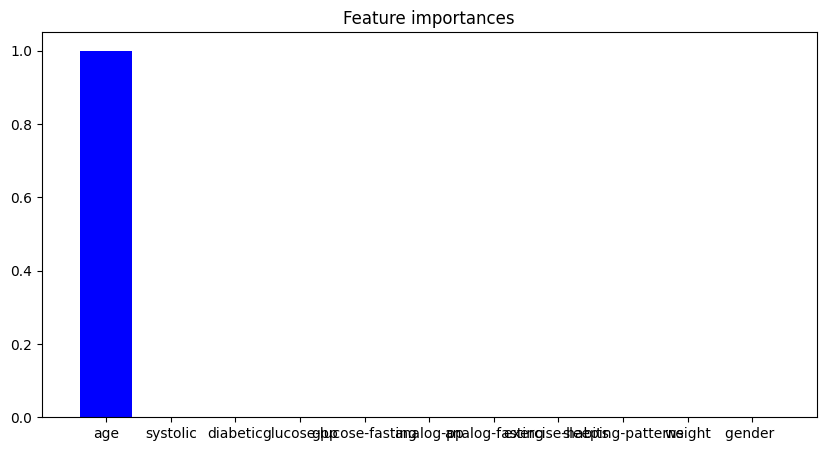

In [157]:
import matplotlib.pyplot as plt
import numpy as np

feature_names=df.columns.tolist()
# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

# Random forest

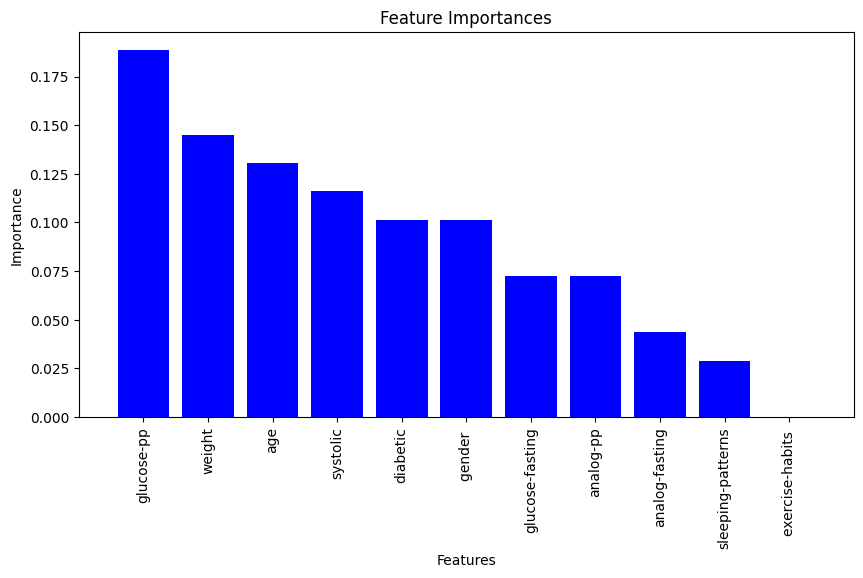

In [158]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), [df.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [159]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Assuming you have a new data point in the same format as your training data
new_data_point = [[30, 1, 89, 0, 0, 140, 90, 328, 333, 128, 150]]

# Make predictions
prediction = rf_classifier.predict(new_data_point)

# Map prediction to label
prediction_label = "diabetic" if prediction == 1.0 else "non-diabetic"
print(prediction)
print("Predicted diabetic status:", prediction_label)


Accuracy: 1.0
[1]
Predicted diabetic status: diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
